In [54]:
import pandas as pd

df = pd.read_csv('Student_Performance.csv')

In [55]:
df.describe()

,student_id,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score
count,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,7493.04380,16.482760,4.253224,75.084084,63.785944,63.745320,63.681948,64.006172
std,4323.56215,1.703895,2.167541,14.373171,20.875262,20.970529,20.792693,18.932025
min,1.00000,14.000000,0.500000,50.000000,0.000000,0.000000,0.000000,14.500000
25%,3743.75000,15.000000,2.400000,62.800000,48.300000,48.200000,48.300000,49.000000
50%,7461.50000,16.000000,4.300000,75.100000,64.100000,64.100000,64.200000,64.200000
75%,11252.00000,18.000000,6.100000,87.500000,80.000000,80.000000,80.000000,79.000000
max,15000.00000,19.000000,8.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             25000 non-null  int64  
 1   age                    25000 non-null  int64  
 2   gender                 25000 non-null  object 
 3   school_type            25000 non-null  object 
 4   parent_education       25000 non-null  object 
 5   study_hours            25000 non-null  float64
 6   attendance_percentage  25000 non-null  float64
 7   internet_access        25000 non-null  object 
 8   travel_time            25000 non-null  object 
 9   extra_activities       25000 non-null  object 
 10  study_method           25000 non-null  object 
 11  math_score             25000 non-null  float64
 12  science_score          25000 non-null  float64
 13  english_score          25000 non-null  float64
 14  overall_score          25000 non-null  float64
 15  fi

In [57]:
df.head(5)

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,not es,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


In [58]:
df.shape

(25000, 16)

In [59]:
df.isnull().sum()

student_id               0
age                      0
gender                   0
school_type              0
parent_education         0
study_hours              0
attendance_percentage    0
internet_access          0
travel_time              0
extra_activities         0
study_method             0
math_score               0
science_score            0
english_score            0
overall_score            0
final_grade              0
dtype: int64

In [60]:
print('Duplicates Count: ', df.duplicated().sum())
df = df.drop_duplicates()

Duplicates Count:  10000


In [61]:
# features creation

import numpy as np
print(df['final_grade'].value_counts().reset_index())

passed =['a', 'b', 'c', 'd']
failed =['e', 'f']

df['Final_Decision'] = np.where(df['final_grade'].isin(passed), 'Pass', 'Fail')
df[['final_grade', 'Final_Decision']].head(7)


  final_grade  count
0           d   3770
1           c   3697
2           e   3378
3           f   1796
4           b   1638
5           a    721


,final_grade,Final_Decision
0,e,Fail
1,d,Pass
2,b,Pass
3,e,Fail
4,f,Fail
5,d,Pass
6,f,Fail


In [62]:
# cehcking grading system outliers

a = df.loc[df['final_grade'] == 'e']['overall_score'].sort_index()
print(a.min())
print(a.max())

40.0
55.0


In [63]:
b = df.loc[df['final_grade'] == 'f']['overall_score']
print(b.min())
print(b.max())

14.5
40.0


In [64]:
df['Catch-up_Sessions'] = np.where(df['final_grade'] == 'e', 'Yes', 'No')

In [65]:
print(df['attendance_percentage'].min())
print(df['attendance_percentage'].max())
print(df['attendance_percentage'].median())

df['Excluded'] = np.where(df['attendance_percentage'] < 75, 'Excluded', 'Not Excluded')

50.0
100.0
75.0


In [66]:
categorical_cols = ['gender', 'school_type', 'parent_education', 'internet_access', 'travel_time', 'extra_activities', 'study_method', 'final_grade']

for col in categorical_cols:
    df[col] = df[col].astype('category')

numerical_cols = ['age', 'study_hours', 'attendance_percentage', 'math_score', 'science_score', 'english_score', 'overall_score']



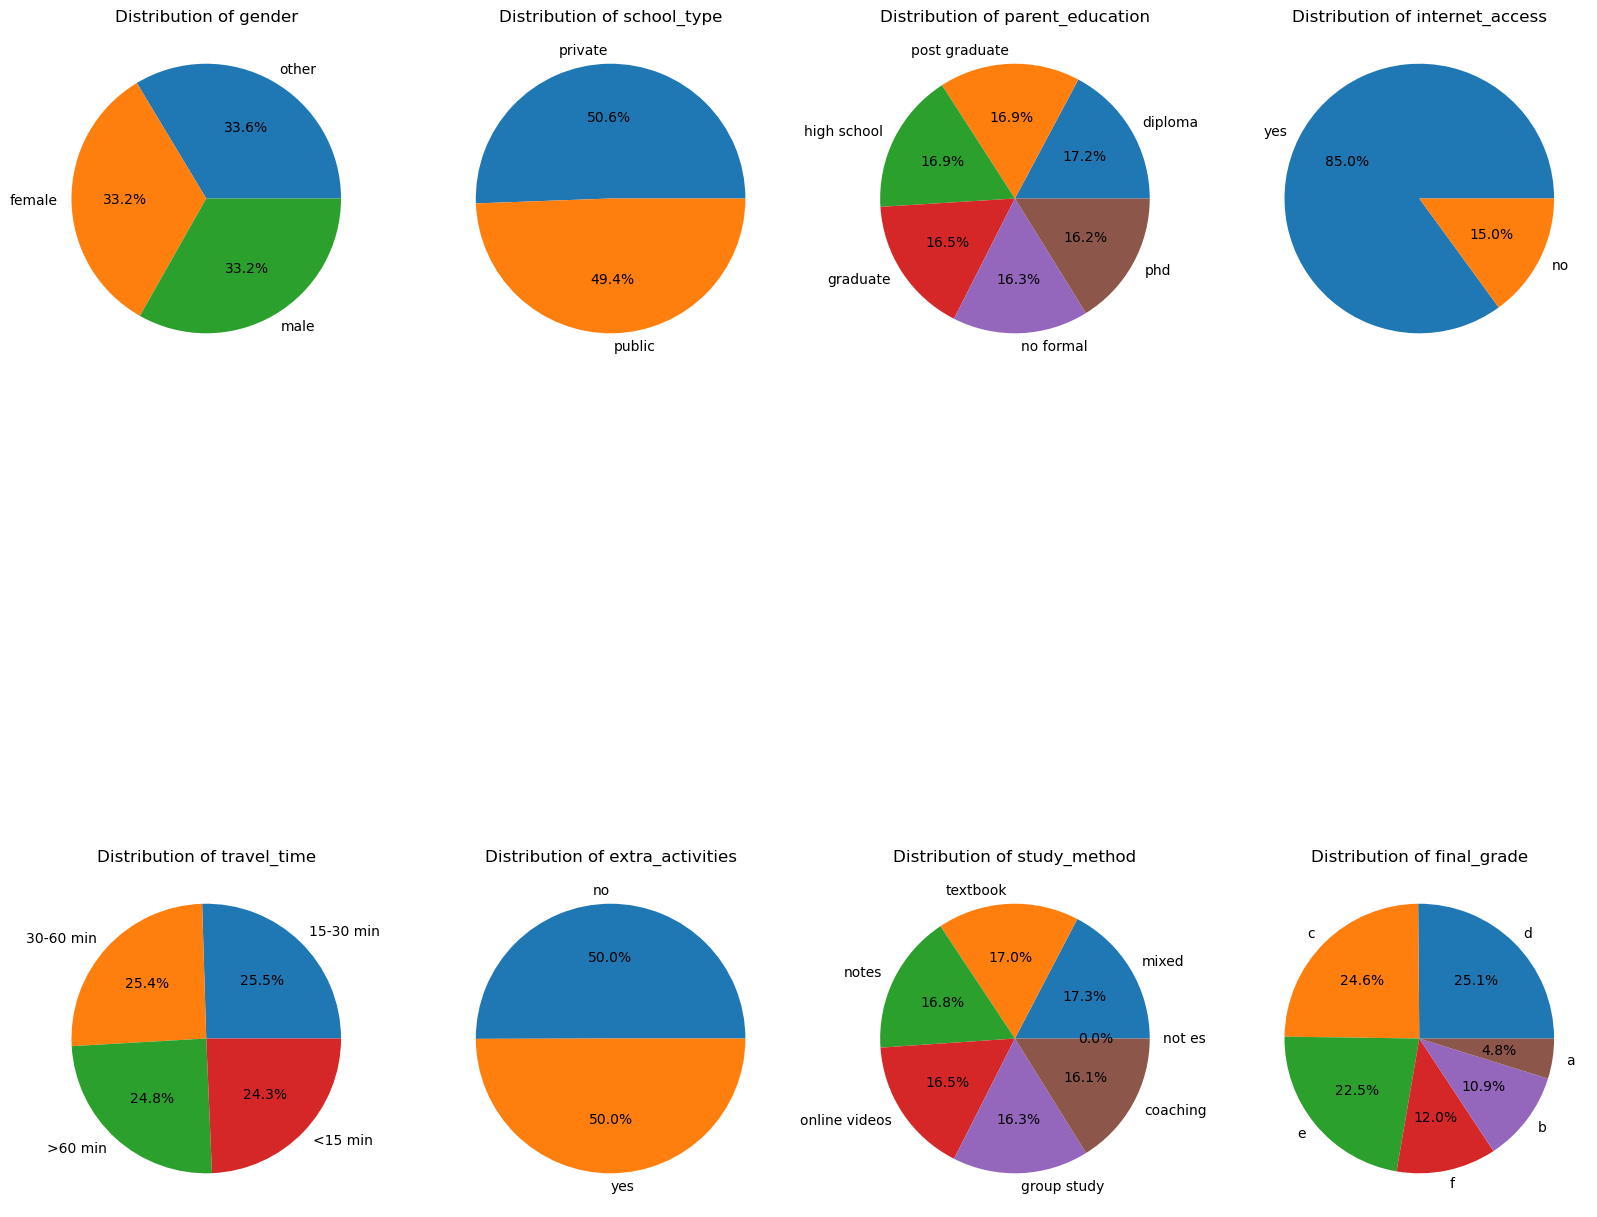

In [67]:
# graphical representations
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(20,20))

axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    data = df[col].value_counts()
    if len(data) > 10:
        data = data.head(10)

    axes[i].pie(
        data.values, labels=data.index, autopct='%.1f%%'
    )
    axes[i].set_title(f'Distribution of {col}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')


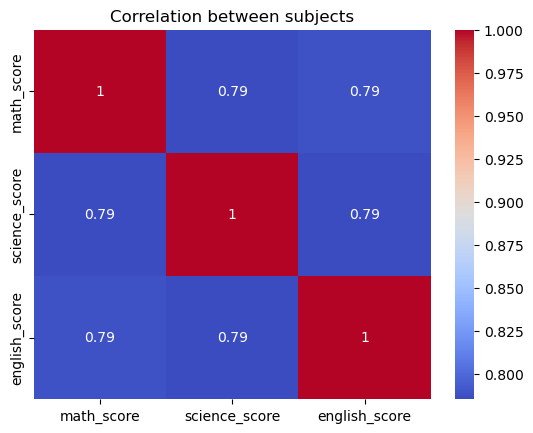

In [68]:
import seaborn as sns
modules = ['math_score','science_score','english_score']
correlation = df[modules].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between subjects')
plt.show()

- A Pearson correlation around **0.79** indicates a strong positive linear association: on average, students who do well in one module tend to do well in others.
- **Important**: this is association, not proof that doing better in one subject causes better results in anothe

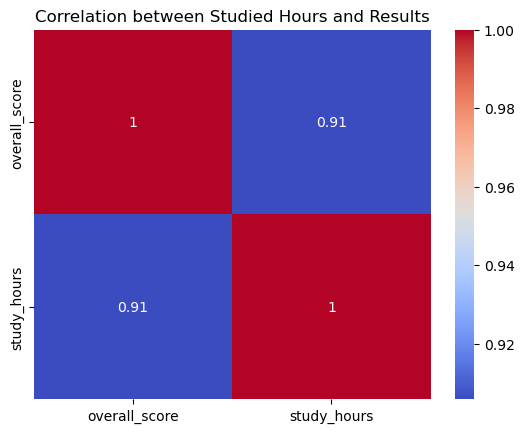

In [69]:
score_hours_cr = ['overall_score', 'study_hours']
correlation = df[score_hours_cr].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Studied Hours and Results')
plt.show()

- There is a **positive** association between study hours and overall score — students who **study more** tend to get **higher scores**

In [71]:
df.to_csv('Student_Performance_Cleaned.csv', index=False)